C:\Users\suraj\AppData\Local\Temp\ipykernel_21368\1426130765.py:5: DtypeWarning: Columns (10,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('wind_turbines_data.csv', encoding='latin1')


   case_id    faa_ors           faa_asn   eia_id t_state           t_county  \
0  3046262  25-025115  2013-WTE-5497-OE  58661.0      MA  Barnstable County   
1  3046335  25-025116  2013-WTE-5773-OE  58661.0      MA  Barnstable County   
2  3039277  25-022039  2011-WTE-7516-OE  57253.0      MA  Barnstable County   
3  3039278  25-022038  2011-WTE-7517-OE  57253.0      MA  Barnstable County   
4  3014014  39-003863  2003-AGL-6902-OE  56226.0      OH        Wood County   

   t_fips                                    p_name  p_year  p_tnum  ...  \
0   25001                6th Space Warning Squadron  2013.0       2  ...   
1   25001                6th Space Warning Squadron  2013.0       2  ...   
2   25001                        AFCEE MMR Turbines  2011.0       2  ...   
3   25001                        AFCEE MMR Turbines  2011.0       2  ...   
4   39173  AMP-Ohio/Green Mountain Energy Wind Farm  2004.0       2  ...   

  t_ttlh retrofit retrofit_year  t_conf_atr  t_conf_loc  t_img_date 

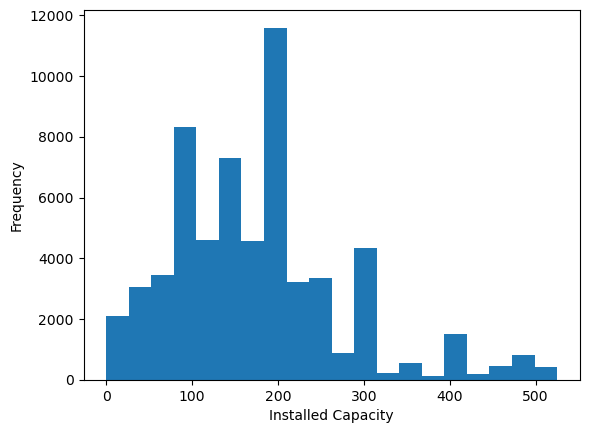

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wind_turbines_data.csv', encoding='latin1')

print(data.head())

print("Shape of the dataset:", data.shape)

print(data.describe())

data['p_cap'] = pd.to_numeric(data['p_cap'], errors='coerce')

plt.hist(data['p_cap'].dropna(), bins=20)
plt.xlabel('Installed Capacity')
plt.ylabel('Frequency')
plt.show()


In [5]:
unique_manufacturers = data['t_manu'].unique()
print(unique_manufacturers)

['GE Wind' 'Vestas' 'Siemens' 'Alstom' 'Suzlon' 'Fuhrlander' 'Gamesa'
 'Siemens Gamesa Renewable Energy' 'Nordex' 'Leitner Poma' 'NEG Micon'
 'Mitsubishi' 'Vensys' 'Goldwind' 'Acciona' 'REpower' 'EWT' 'Clipper'
 'Sinovel' 'Northern Power Systems' 'China Creative Wind Energy' 'DeWind'
 nan 'Zond' 'NedWind' 'Guodian' 'Sany' 'Bonus' 'Goldwind Americas'
 'Kenersys' 'Samsung' 'RRB' 'HZ Windpower' 'Enron' 'Entegrity'
 'Turbowinds' 'Nordic' 'AOC'
 'Changzhou Railcar Propulsion Engineering Research and Development Center'
 'AAER' 'Unison' 'GE1.5-82.5' 'GW87' 'HQ1650']


In [6]:
manufacturer_counts = data['t_manu'].value_counts()
print(manufacturer_counts)


GE Wind                                                                     28553
Vestas                                                                      14883
Siemens                                                                      4742
Gamesa                                                                       3024
Mitsubishi                                                                   2539
Siemens Gamesa Renewable Energy                                              1987
Nordex                                                                       1425
Suzlon                                                                       1298
Acciona                                                                       758
REpower                                                                       554
NEG Micon                                                                     311
Clipper                                                                       284
Goldwind        

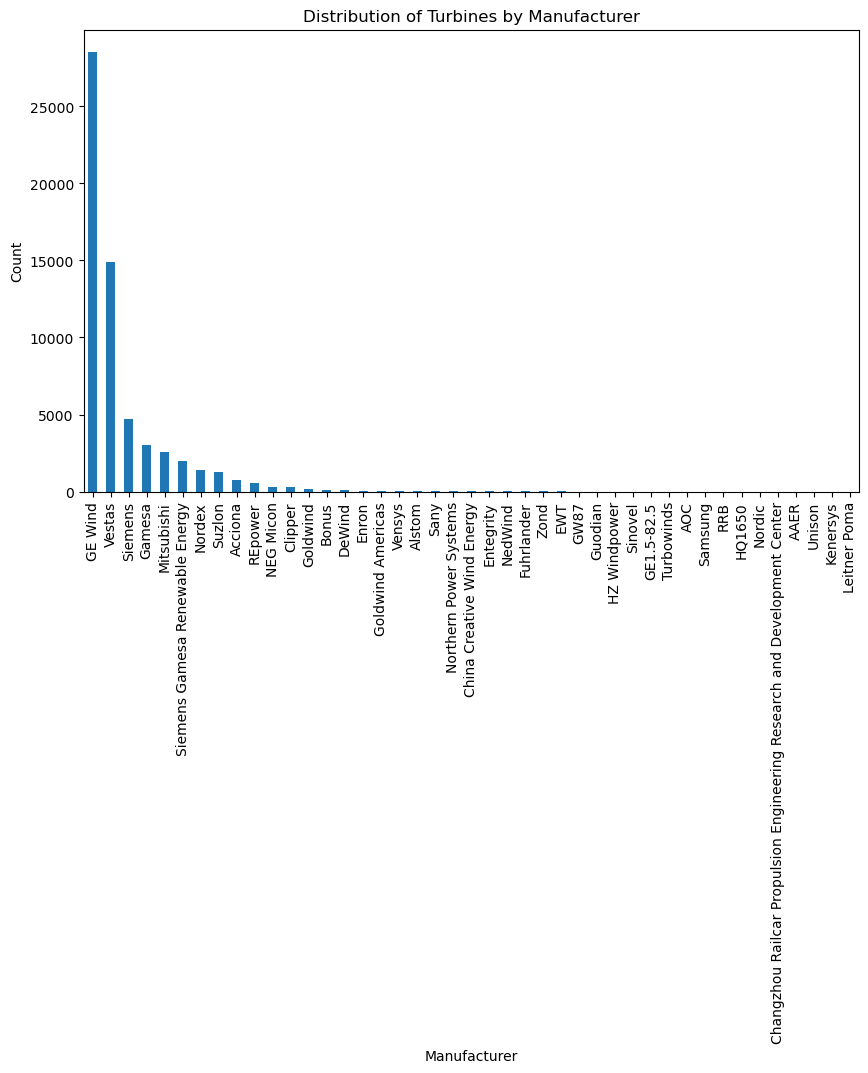

In [7]:
plt.figure(figsize=(10, 6))
manufacturer_counts.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Turbines by Manufacturer')
plt.show()

C:\Users\suraj\AppData\Local\Temp\ipykernel_1056\139935319.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[columns_of_interest].corr()


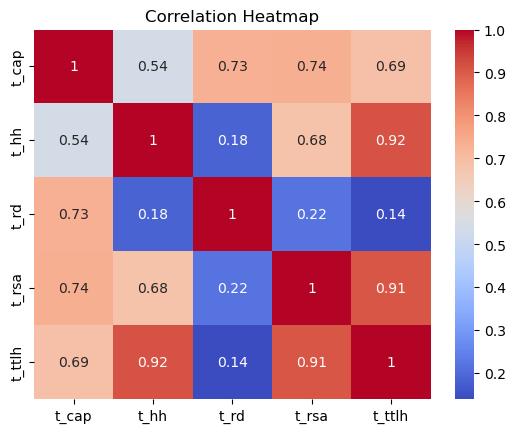

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_of_interest = ['t_manu', 't_model', 't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh']
correlation_matrix = data[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


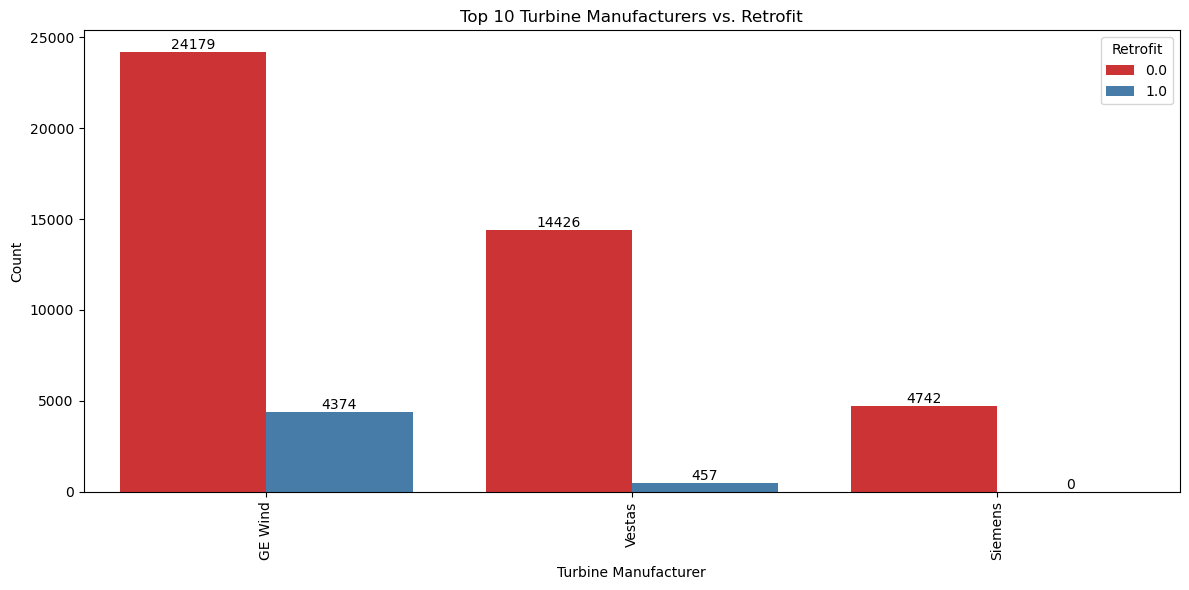

In [41]:
top_10_manufacturers = data['t_manu'].value_counts().nlargest(3).index
filtered_data = data[data['t_manu'].isin(top_10_manufacturers)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=filtered_data, x='t_manu', hue='retrofit', order=top_10_manufacturers, palette='Set1', width=0.8)

plt.xlabel('Turbine Manufacturer')
plt.ylabel('Count')
plt.title('Top 10 Turbine Manufacturers vs. Retrofit')
plt.xticks(rotation=90)
plt.legend(title='Retrofit')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()




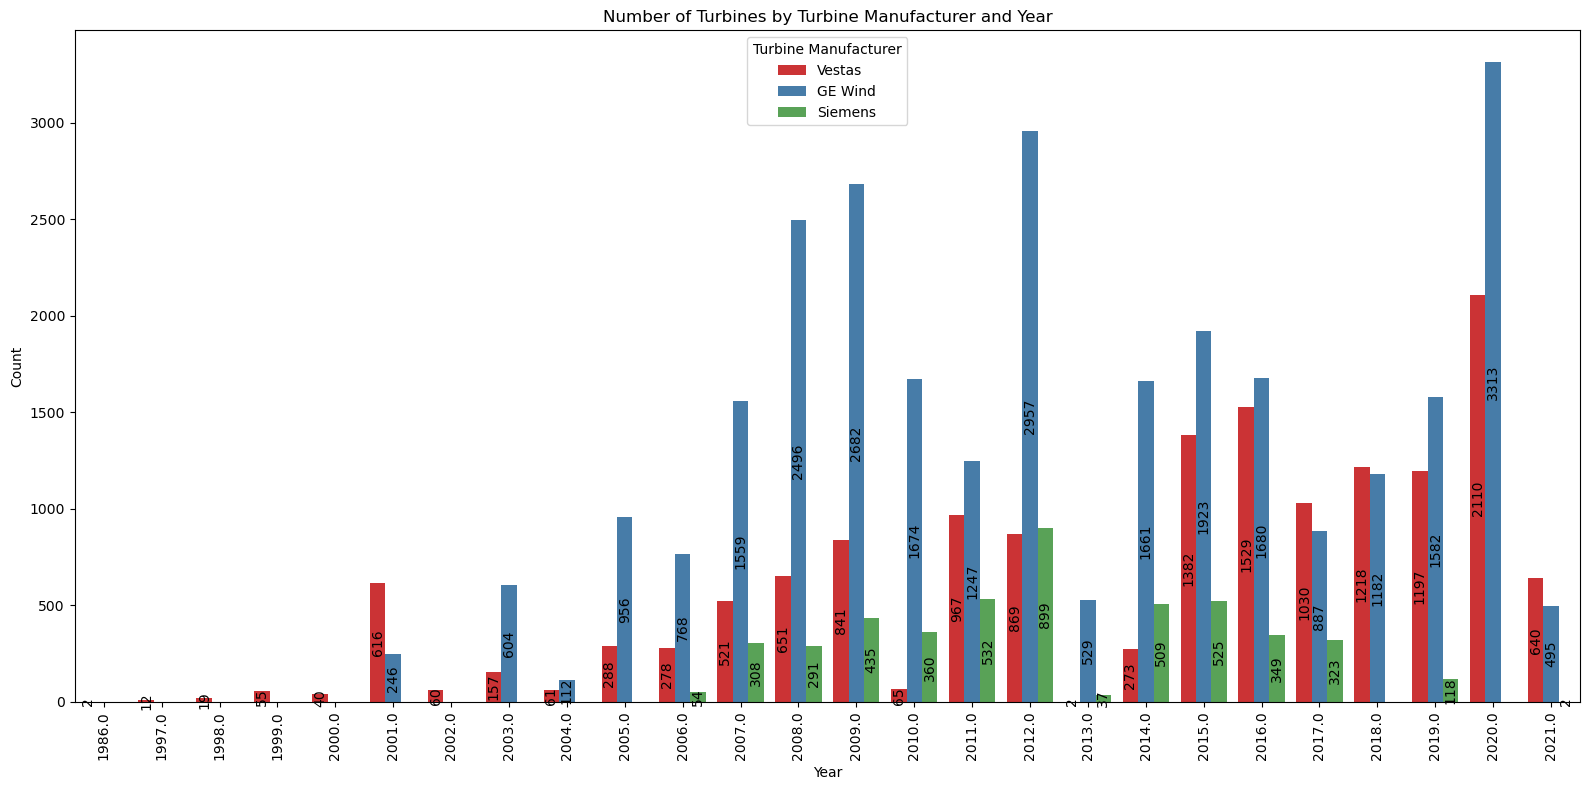

In [37]:
top_10_manufacturers = data['t_manu'].value_counts().nlargest(3).index
filtered_data = data[data['t_manu'].isin(top_10_manufacturers)]

plt.figure(figsize=(16, 8))
count_data = filtered_data.groupby(['t_manu', 'p_year']).size().reset_index(name='Count')
count_data = count_data.sort_values(['p_year', 'Count'], ascending=[True, False])

ax = sns.barplot(data=count_data, x='p_year', y='Count', hue='t_manu', palette='Set1', width=0.8)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Turbines by Turbine Manufacturer and Year')
plt.xticks(rotation=90)
plt.legend(title='Turbine Manufacturer')
ax.bar_width = 0.6

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_x(), p.get_y()
    ax.annotate(format(height, '.0f'), (x + width / 2, y + height/2), ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()



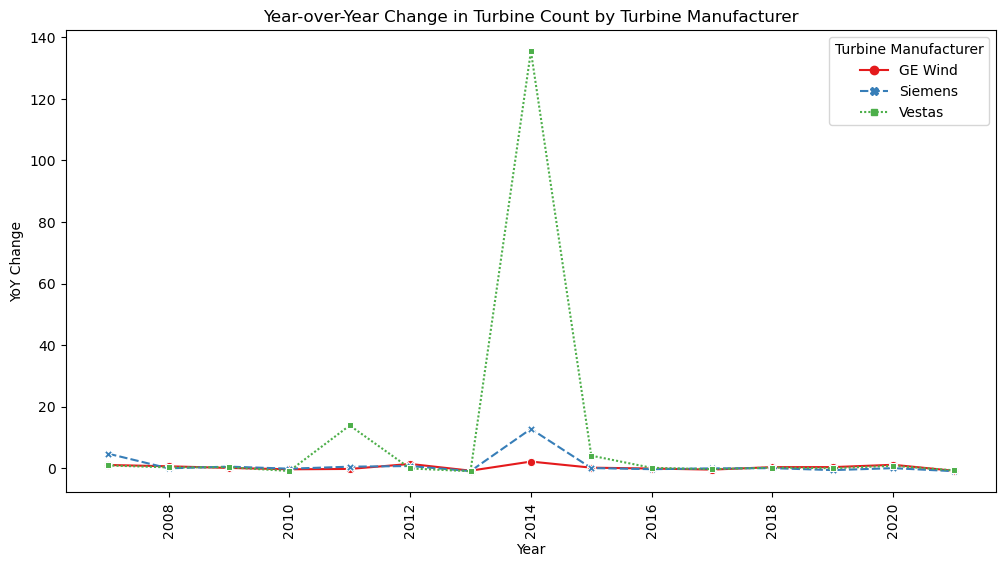

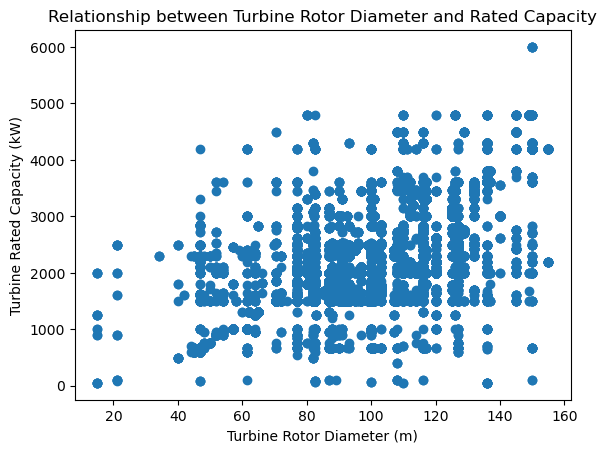

In [3]:

import matplotlib.pyplot as plt

# Plot the scatter plot
plt.scatter(data['t_rd'], data['t_cap'])

# Set the labels and title
plt.xlabel('Turbine Rotor Diameter (m)')
plt.ylabel('Turbine Rated Capacity (kW)')
plt.title('Relationship between Turbine Rotor Diameter and Rated Capacity')

# Show the plot
plt.show()


In [4]:
correlation = data['t_rd'].corr(data['t_cap'])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.7322662460850402


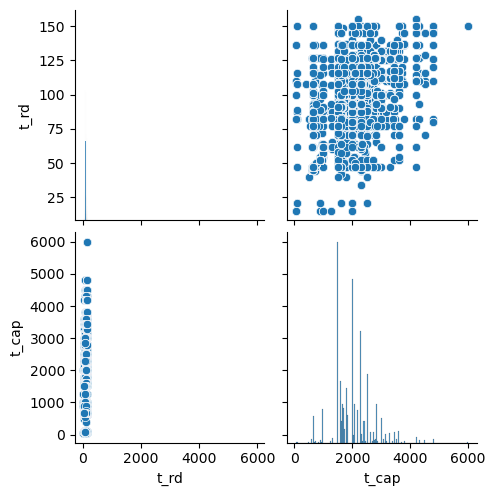

In [5]:
import seaborn as sns

sns.pairplot(data[['t_rd', 't_cap']])
plt.show()


In [6]:
import statsmodels.api as sm

# Add a constant term to the predictor variable
X = sm.add_constant(data['t_rd'])

# Create the linear regression model
model = sm.OLS(data['t_cap'], X)

# Fit the model
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())


MissingDataError: exog contains inf or nans